/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

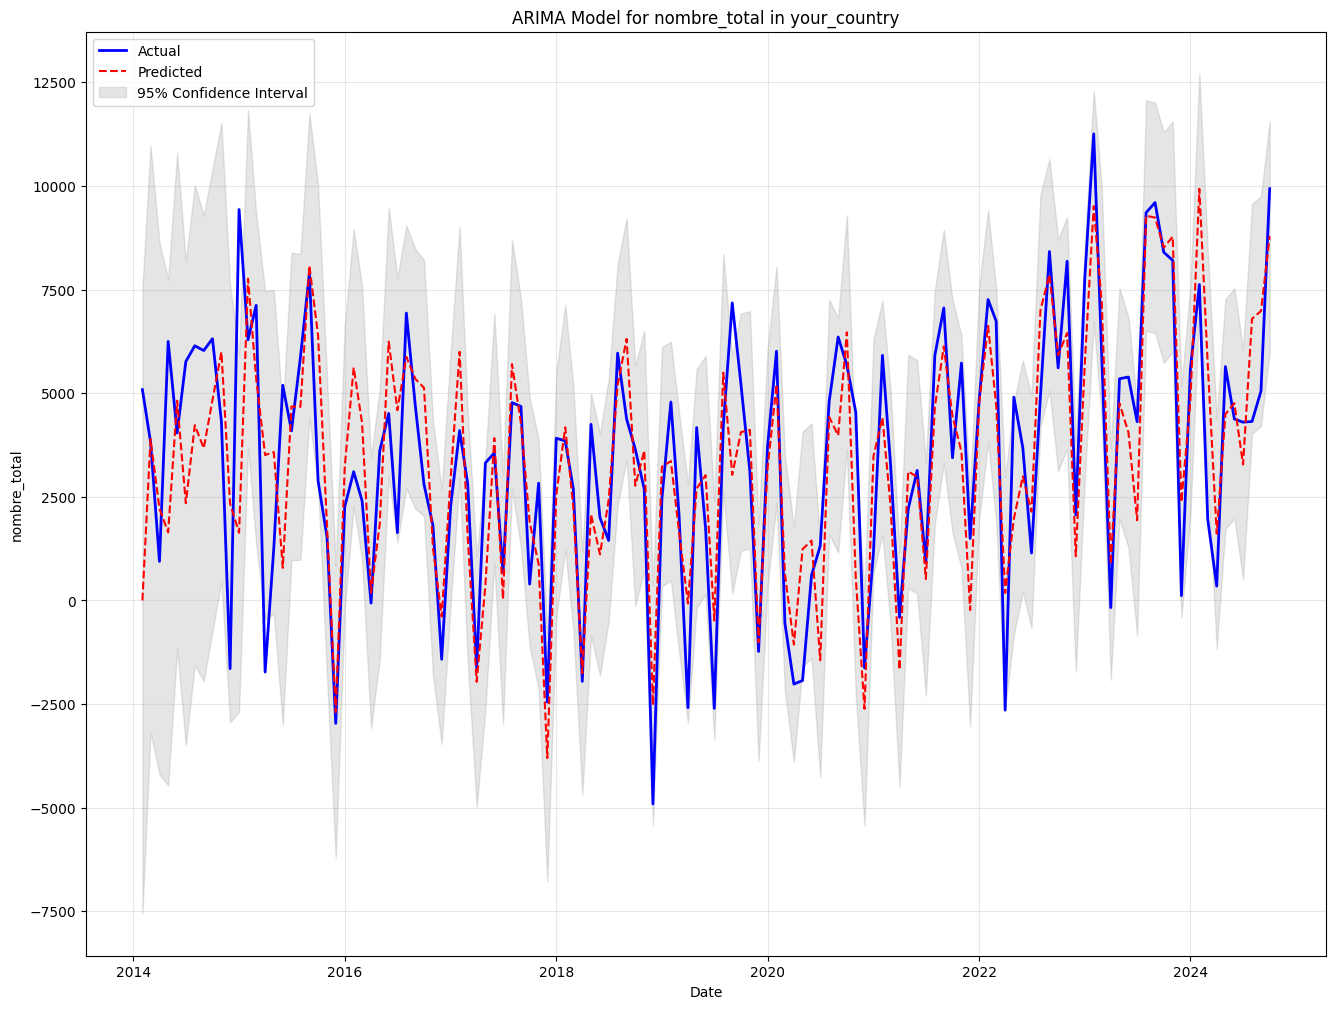

In [32]:
# ARIMA
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("dataset_reformate2.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# List of countries to include in the sum
countries = ["Total Europe", "Total Africa", "Total America", "Total Asia", "Total Oceania", "Total Unknown Origin"]

# Filter data for the specified countries
df_countries = df[df['pays'].isin(countries)]

# Group by 'date' and sum 'entree_mensuelle'
df_sum = df_countries.groupby('date')['entree_mensuelle'].sum().reset_index()

# Set 'date' as index
df_sum = df_sum.set_index('date')

# Select the relevant column for SARIMA modeling 
data = df_sum['entree_mensuelle']

# Fit the ARIMA model (you'll need to determine the appropriate p, d, q values)
# Example: ARIMA(p=5, d=1, q=0) 
model = ARIMA(data, order=(24,1,20)) 
model_fit = model.fit()

# Get predictions and confidence intervals
pred = model_fit.get_prediction(start=0, end=len(data) - 1)
pred_ci = pred.conf_int()

# Plot the data and predictions
plt.figure(figsize=(16, 12))
plt.plot(data.index, data, label='Actual', color='blue', linewidth=2)
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Predicted', color='red', linestyle='--')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1],
                 color='gray',
                 alpha=.2, 
                 label='95% Confidence Interval')

plt.title(f'ARIMA Model for nombre_total in your_country')
plt.xlabel('Date')
plt.ylabel('nombre_total')
plt.legend()
#plt.ylim(1700000,2100000)
plt.grid(alpha=0.3)
#plt.xlim("2008-03-01",)
plt.show()

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

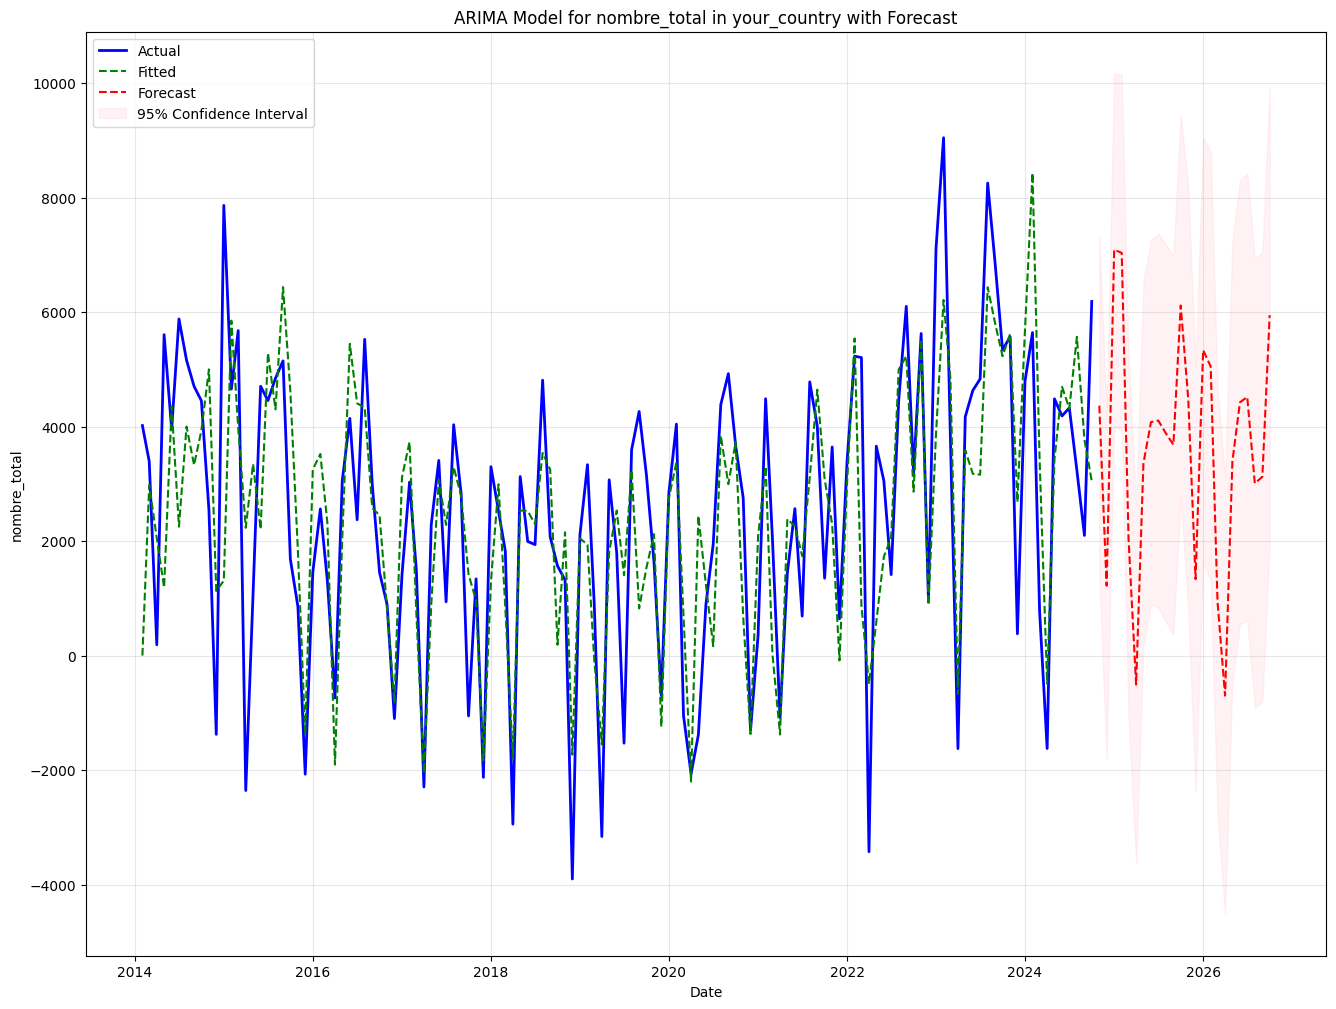

In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("dataset_reformate2.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df_country = df[df['pays'] == 'Total Europe']
# Set 'date' as index
df_country = df_country.set_index('date')
# Select the relevant column for ARIMA modeling ('nombre_total' in this case)
data = df_country['entree_mensuelle']

# Fit the ARIMA model (you'll need to determine the appropriate p, d, q values)
# Example: ARIMA(p=5, d=1, q=0) 
model = ARIMA(data, order=(24,1,5))  
model_fit = model.fit()

# Forecast future values
forecast_steps = 24  # Forecast for the next 12 months
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot the data, predictions, and forecast
plt.figure(figsize=(16, 12))
plt.plot(data.index, data, label='Actual', color='blue', linewidth=2)
plt.plot(model_fit.fittedvalues.index, model_fit.fittedvalues, label='Fitted', color='green', linestyle='--')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink',
                 alpha=.2, 
                 label='95% Confidence Interval')

plt.title(f'ARIMA Model for nombre_total in your_country with Forecast')
plt.xlabel('Date')
plt.ylabel('nombre_total')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

MSE: 3819144.339473528


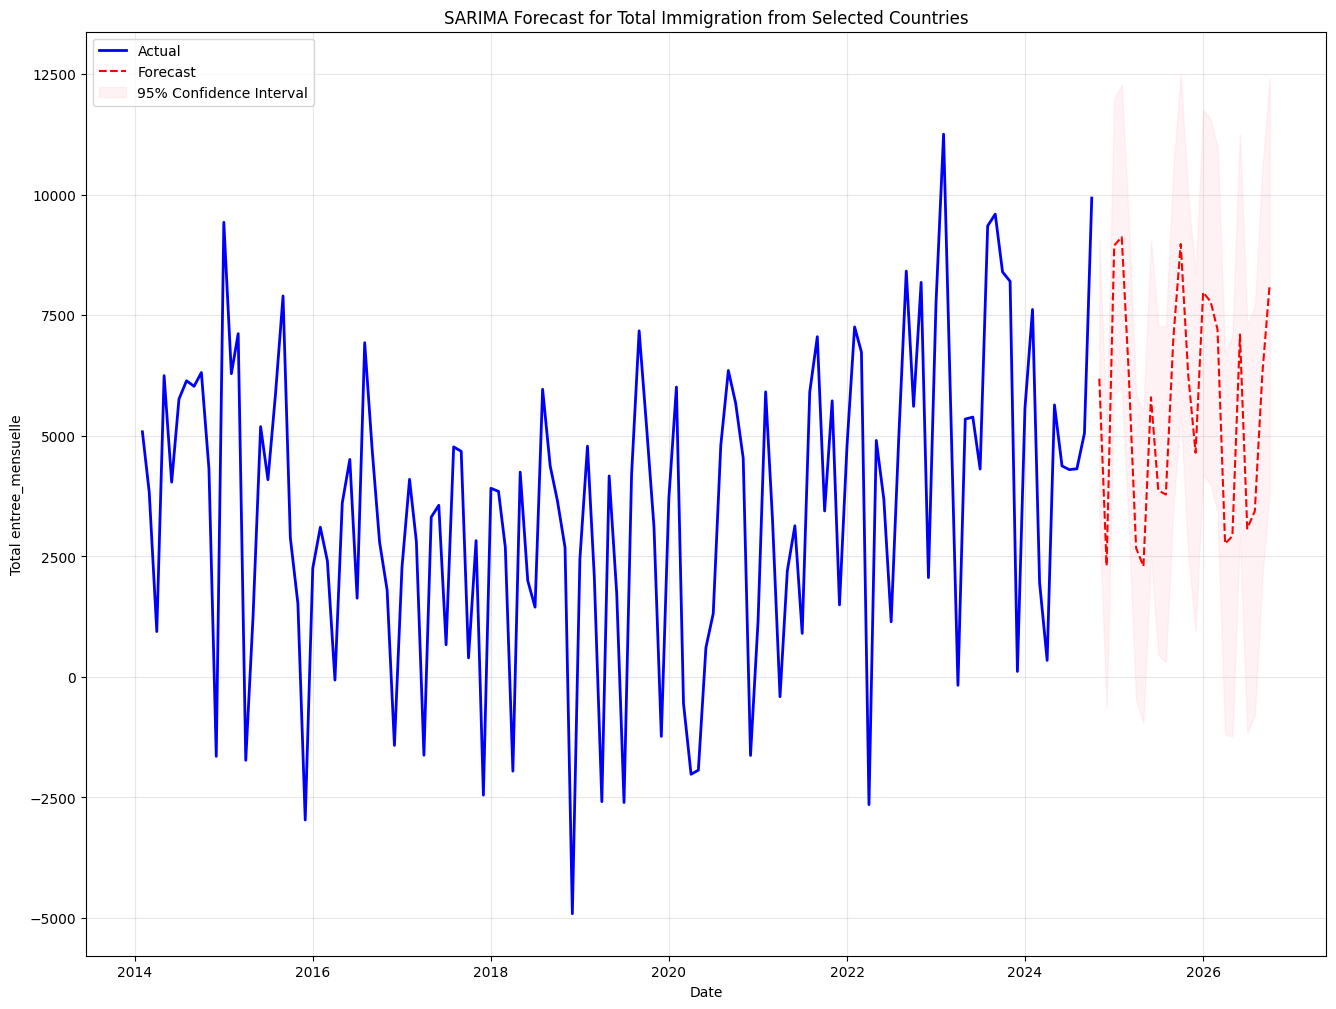

In [33]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("dataset_reformate2.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# List of countries to include in the sum
countries = ["Total Europe", "Total Africa", "Total America", "Total Asia", "Total Oceania", "Total Unknown Origin"]

# Filter data for the specified countries
df_countries = df[df['pays'].isin(countries)]

# Group by 'date' and sum 'entree_mensuelle'
df_sum = df_countries.groupby('date')['entree_mensuelle'].sum().reset_index()

# Set 'date' as index
df_sum = df_sum.set_index('date')

# Select the relevant column for SARIMA modeling 
data = df_sum['entree_mensuelle']

# Fit the SARIMA model (you'll need to determine the appropriate p, d, q, P, D, Q, s values)
# Example: SARIMA(p=1, d=1, q=1, P=1, D=1, Q=1, s=12) 
model = ARIMA(data, order=(23, 1, 20),)
model_fit = model.fit()

# Forecast future values
forecast_steps = 24  # Forecast for the next 24 months
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Calculate MSE using fitted values
mse = np.mean((data - model_fit.fittedvalues)**2)
print(f"MSE: {mse}")

# Plot the data, predictions, and forecast
plt.figure(figsize=(16, 12))
plt.plot(data.index, data, label='Actual', color='blue', linewidth=2)
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink',
                 alpha=.2, 
                 label='95% Confidence Interval')

plt.title(f'SARIMA Forecast for Total Immigration from Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total entree_mensuelle')
plt.legend()
plt.grid(alpha=0.3)
plt.show()